<a href="https://www.kaggle.com/code/eavprog/abscur2?scriptVersionId=161667940" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Оглавление проекта "Абсолютный валютный курс" 

![Проект \"Абсолютный валютный курс\"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:

Расчет в тетрадке на Kaggle: https://www.kaggle.com/code/eavprog/abscur2

Блог: http://www.abscur.ru

Сайт: https://prog815.github.io/abscur2

ВКонтакте: https://vk.com/abscur

WhatsUp: https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs

Viber: https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc

Telegram: https://t.me/AbsCur

Одноклассники: https://ok.ru/group/53547043520717

GitHub: https://github.com/prog815/abscur

YouTube: https://www.youtube.com/playlist?list=PLG1V24vhSKo6MamGtgm2oTkDZHeHBHNFW

Smart-lab: https://smart-lab.ru/my/eavpred/

VC: https://vc.ru/u/262921-aleksey-enin

In [1]:
from lib_av import get_currency_exchange_daily_full

In [2]:
import pandas as pd
import os
import numpy as np
import random
import time
from datetime import timedelta
import matplotlib.pyplot as plt
from lib_gss_abscur2 import post_df_to_ssh

# Список валютных пар

In [3]:
pairs = """AUDHKD
AUDJPY
AUDSEK
AUDUSD
CADJPY
CADSEK
CHFAUD
CHFHKD
CHFJPY
EURAUD
EURCAD
EURCHF
EURCNY
EURCZK
EURGBP
EURHKD
EURILS
EURJPY
EURNOK
EURNZD
EURRUB
EURSEK
EURSGD
EURUSD
EURZAR
GBPAUD
GBPCAD
GBPCHF
GBPHKD
GBPJPY
GBPNOK
GBPRUB
GBPSEK
GBPSGD
GBPUSD
HKDSEK
HKDSGD
JPYHKD
JPYSEK
NZDSEK
NZDUSD
SGDAUD
SGDCHF
SGDJPY
USDAED
USDARS
USDBRL
USDCAD
USDCHF
USDCLP
USDCNY
USDCOP
USDCZK
USDDKK
USDEGP
USDGBP
USDHKD
USDHUF
USDIDR
USDILS
USDINR
USDISK
USDJPY
USDKRW
USDKWD
USDKZT
USDMXN
USDMYR
USDNOK
USDPEN
USDPHP
USDPKR
USDPLN
USDQAR
USDRON
USDRUB
USDSAR
USDSEK
USDSGD
USDTHB
USDTRY
USDTWD
USDUAH
USDVND
USDZAR""".split()
pairs = sorted(pairs)
print(pairs)
print(len(pairs))

['AUDHKD', 'AUDJPY', 'AUDSEK', 'AUDUSD', 'CADJPY', 'CADSEK', 'CHFAUD', 'CHFHKD', 'CHFJPY', 'EURAUD', 'EURCAD', 'EURCHF', 'EURCNY', 'EURCZK', 'EURGBP', 'EURHKD', 'EURILS', 'EURJPY', 'EURNOK', 'EURNZD', 'EURRUB', 'EURSEK', 'EURSGD', 'EURUSD', 'EURZAR', 'GBPAUD', 'GBPCAD', 'GBPCHF', 'GBPHKD', 'GBPJPY', 'GBPNOK', 'GBPRUB', 'GBPSEK', 'GBPSGD', 'GBPUSD', 'HKDSEK', 'HKDSGD', 'JPYHKD', 'JPYSEK', 'NZDSEK', 'NZDUSD', 'SGDAUD', 'SGDCHF', 'SGDJPY', 'USDAED', 'USDARS', 'USDBRL', 'USDCAD', 'USDCHF', 'USDCLP', 'USDCNY', 'USDCOP', 'USDCZK', 'USDDKK', 'USDEGP', 'USDGBP', 'USDHKD', 'USDHUF', 'USDIDR', 'USDILS', 'USDINR', 'USDISK', 'USDJPY', 'USDKRW', 'USDKWD', 'USDKZT', 'USDMXN', 'USDMYR', 'USDNOK', 'USDPEN', 'USDPHP', 'USDPKR', 'USDPLN', 'USDQAR', 'USDRON', 'USDRUB', 'USDSAR', 'USDSEK', 'USDSGD', 'USDTHB', 'USDTRY', 'USDTWD', 'USDUAH', 'USDVND', 'USDZAR']
85


# Список валют

In [4]:
curs = set()

for pair in pairs:
    curs.add(pair[:3])
    curs.add(pair[3:])

curs = sorted(list(curs))

print(curs)
print(len(curs))

['AED', 'ARS', 'AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CNY', 'COP', 'CZK', 'DKK', 'EGP', 'EUR', 'GBP', 'HKD', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JPY', 'KRW', 'KWD', 'KZT', 'MXN', 'MYR', 'NOK', 'NZD', 'PEN', 'PHP', 'PKR', 'PLN', 'QAR', 'RON', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TRY', 'TWD', 'UAH', 'USD', 'VND', 'ZAR']
45


# Загрузка валютных пар

В тетрадке реализована загрузка исторических курсов для 85 валютных пар, торгуемых на Forex. Все курсы сохраняются в каталоге pairs тетрадки. 

In [5]:
# копирование предыдущих
! cp -r /kaggle/input/abscur2/pairs ./pairs

In [ ]:
# Непосредственно загрузка

for pair in pairs[:]:
    for n in range(3):
        try:
            df = get_currency_exchange_daily_full(pair)
            df.to_csv("./pairs/" + pair + ".csv")
            print(pair, "- загружена. С " + str(df.index.min().date()) + ". По " + str(df.index.max().date()) + ". Строк " + str(df.shape[0]) + ".")
            break
        except Exception as e:
            print(pair, "- ошибка загрузки")
            time.sleep(5)

# Соединяем парные курсы в одну таблицу

Собирается таблица с курсами закрытий всех загруженных валютных пар, которая сохраняется в тетрадке под именем `pairs_close.csv`. Все сохраненные в тетрадке файлы доступны для скачивания без ограничений. 

Таблица с курсами закрытий парных валютных курсов выкладывается на листе в Google Docs по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=302188018.

Графики парных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/blog-page_54.html и на сайте по адресу https://prog815.github.io/abscur2/pair.html.

In [6]:
pairs_close = pd.DataFrame(columns=["Date"])
pairs_close.set_index('Date', inplace=True)

max_start_date = pd.to_datetime('1900-01-01').date()

for pair in pairs[:]:
    df = pd.read_csv("./pairs/" + pair + ".csv",index_col="Date")
    df.rename(columns={'Close': pair}, inplace=True)
    max_start_date = max(max_start_date, pd.to_datetime(df.index.min()).date())
    pairs_close = pairs_close.join(df[[pair]], how='outer')
    
pairs_close = pairs_close[pd.to_datetime(pairs_close.index).date >= max_start_date]
df.sort_index(inplace=True)
pairs_close.fillna(method='ffill',inplace=True)
pairs_close.fillna(method='bfill',inplace=True)

# сохранем на диск
pairs_close.to_csv("pairs_close.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Парные валютные курсы",pairs_close)

pairs_close

,AUDHKD,AUDJPY,AUDSEK,AUDUSD,CADJPY,CADSEK,CHFAUD,CHFHKD,CHFJPY,EURAUD,...,USDRUB,USDSAR,USDSEK,USDSGD,USDTHB,USDTRY,USDTWD,USDUAH,USDVND,USDZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,6.6777,101.899,6.4085,0.86124,104.827,6.5935,1.20040,8.0207,122.364,1.44409,...,44.9400,3.7515,7.44410,1.30274,32.82,2.22920,30.975,15.0605,21285.0,11.0124
2014-11-25,6.6144,100.600,6.3335,0.85324,104.712,6.5940,1.21500,8.0410,122.274,1.46174,...,46.3139,3.7514,7.42460,1.30009,32.80,2.21880,30.932,15.0070,21370.0,10.9557
2014-11-26,6.6196,100.405,6.3140,0.85385,104.501,6.5725,1.21770,8.0646,122.314,1.46442,...,47.3936,3.7523,7.39740,1.29763,32.74,2.20960,30.895,14.9730,21380.0,10.9492
2014-11-27,6.6055,100.439,6.3360,0.85216,103.925,6.5544,1.21550,8.0336,122.195,1.46176,...,49.0969,3.7523,7.43510,1.29889,32.77,2.20600,30.895,14.9730,21380.0,10.9656
2014-11-28,6.5938,100.900,6.3270,0.85025,103.908,6.5150,1.21760,8.0347,122.860,1.46337,...,50.4738,3.7528,7.44610,1.30275,32.83,2.21980,30.980,14.9690,21300.0,11.0130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,5.1643,97.511,6.8988,0.66111,109.948,7.7790,1.75570,9.0710,171.223,1.63853,...,89.2762,3.7480,10.43734,1.34017,35.44,30.32831,31.160,37.7811,24530.0,18.8046
2024-01-30,5.1612,97.444,6.8698,0.66020,110.164,7.7658,1.75700,9.0711,171.263,1.64212,...,89.6000,3.7480,10.40682,1.33919,35.37,30.30680,31.134,37.8862,24395.0,18.7981
2024-01-31,5.1331,96.447,6.8228,0.65665,109.335,7.7332,1.76710,9.0749,170.547,1.64636,...,89.9630,3.7480,10.38681,1.33964,35.52,30.30246,31.246,37.8746,24415.0,18.6717


# Расчет абсолютных курсов

Делаем на примере расчета абсолютных курсов апроксимацией в тетрадке https://www.kaggle.com/code/eavprog/abscur-approks

Любой парный валютный курс можно представить как отношение двух абсолютных валютных курсов.
$$
EURUSD = \frac{EUR}{USD}
$$

Сначала собираем матрицу перехода между парными и абсолютными курсами. Она состоит нолей, единиц и минус единиц. Горизонтали соотвествуют парным валютным курсам. Вертикали соотвествуют конкретным валютам. Ноль означет отсутствие связи между валютной парой и валютой. Единица означает что валюта в числителе. Минус единица означает что валюта в знаменателе.

In [7]:
# Строим матрицу перехода от абсолютныых курсов к парным
M = np.zeros([len(pairs),len(curs)])
for pair in pairs:
    cur1,cur2 = pair[:3],pair[3:]
    pair_index = pairs.index(pair)
    cur1_index = curs.index(cur1)
    cur2_index = curs.index(cur2)
    M[pair_index,cur1_index] = 1
    M[pair_index,cur2_index] = -1
M 

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1., -1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0., -1.]])

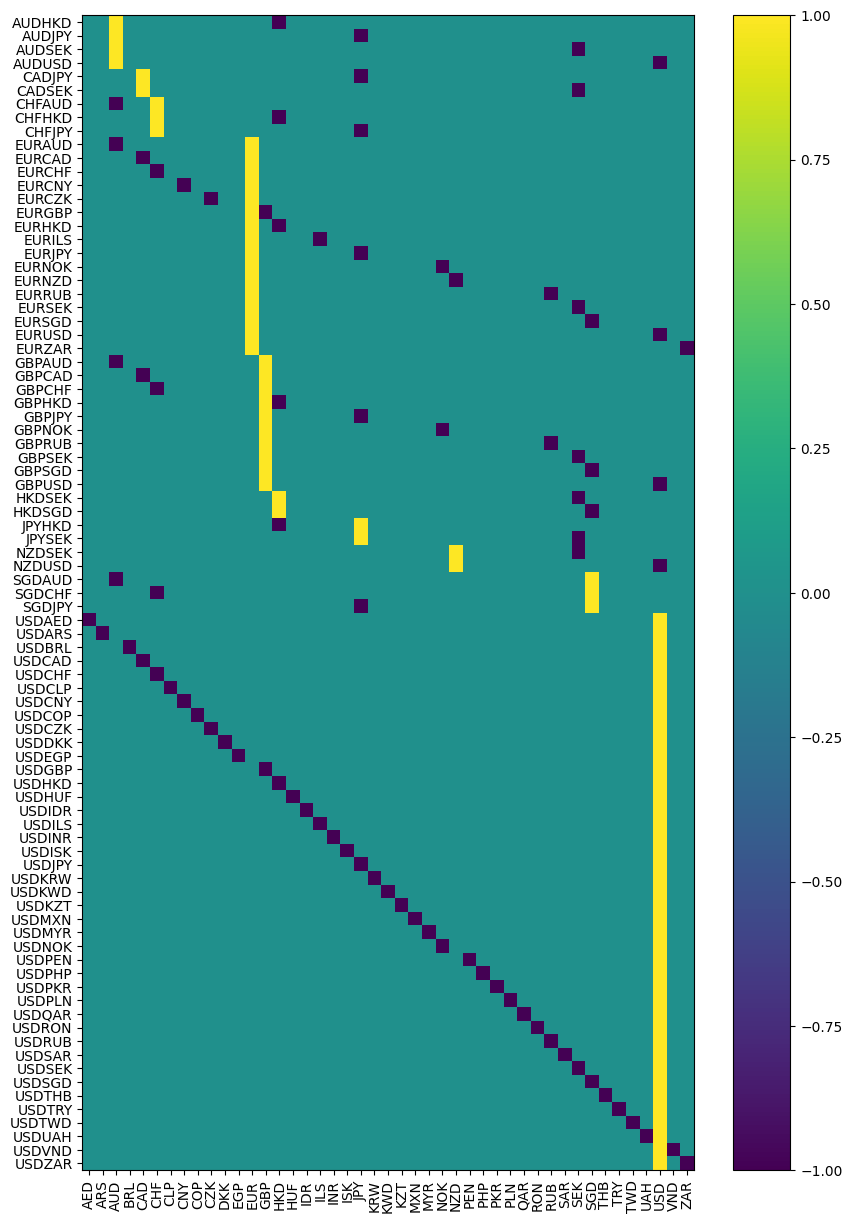

In [8]:
# выводим матрицу
plt.figure(figsize=(10,15))
plt.imshow(M, cmap='viridis', interpolation='none')
plt.xticks(np.arange(len(curs)), curs, rotation=90)
plt.yticks(np.arange(len(pairs)), pairs)
plt.colorbar()
plt.show()

Считаем абсолютные курсы аппроксимацией¶

В каждом дне решаем уравнение методом наименьших квадратов и получем абсолютный курс для каждой валюты. В цикле проходим по всем дням.

Результирующая таблица сохраняется под именем `abscur.csv`.

Кроме того таблица сохраняется в Google Drive по адресу https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=2038786153.

Графики абсолютных валютных курсов в интерактивном режиме можно посмотреть в блоге по адресу https://www.abscur.ru/p/2.html и на сайте по адресу https://prog815.github.io/abscur2/abs.html.

In [9]:
abscur = pd.DataFrame(columns=curs,index=pd.to_datetime(pairs_close.index), dtype='float64')
for i in range(pairs_close.shape[0]):
    lnA, _, _, _ = np.linalg.lstsq(M, np.log(pairs_close.iloc[i,:].values), rcond=None)
    abscur.iloc[i,:] = np.exp(lnA)

# сохранем на диск
abscur.to_csv("abscur.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Абсолютные валютные курсы",abscur)

abscur

,AED,ARS,AUD,BRL,CAD,CHF,CLP,CNY,COP,CZK,...,SAR,SEK,SGD,THB,TRY,TWD,UAH,USD,VND,ZAR
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,3.844085,1.657764,12.158532,5.551962,12.507780,14.599579,0.023699,2.298364,0.006567,0.636994,...,3.762725,1.897275,10.832582,0.430099,6.332255,0.455718,0.937277,14.115863,0.000663,1.282032
2014-11-25,3.845026,1.658125,12.044260,5.587011,12.537043,14.637972,0.023580,2.300952,0.006512,0.638982,...,3.763644,1.901863,10.857119,0.430455,6.363320,0.456451,0.940823,14.118935,0.000661,1.289350
2014-11-26,3.841363,1.655573,12.044227,5.646938,12.534427,14.671377,0.023558,2.297838,0.006518,0.639988,...,3.759157,1.907487,10.866809,0.430833,6.383728,0.456562,0.942061,14.105485,0.000660,1.288256
2014-11-27,3.851504,1.659989,12.056681,5.596354,12.472853,14.663309,0.023544,2.303284,0.006541,0.638683,...,3.769183,1.903254,10.887826,0.431587,6.411200,0.457780,0.944574,14.143106,0.000662,1.289905
2014-11-28,3.864434,1.664195,12.066339,5.615143,12.423567,14.698804,0.023342,2.309958,0.006402,0.640192,...,3.781333,1.908499,10.882698,0.432245,6.392733,0.458056,0.947998,14.190588,0.000666,1.288382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-29,5.947862,0.026466,14.436544,4.412054,16.277404,25.352492,0.023484,3.043962,0.005562,0.953617,...,5.827254,2.092622,16.295355,0.616268,0.720137,0.700916,0.578081,21.840549,0.000890,1.161240
2024-01-30,5.943353,0.026431,14.407787,4.408620,16.285361,25.319975,0.023360,3.040403,0.005581,0.956947,...,5.822837,2.097302,16.292523,0.617020,0.720102,0.700970,0.576041,21.823993,0.000895,1.161183
2024-01-31,5.945170,0.026420,14.337367,4.408543,16.248397,25.341743,0.023436,3.046312,0.005604,0.952826,...,5.824617,2.101926,16.286123,0.614602,0.720425,0.698671,0.576393,21.830664,0.000894,1.169068


# Задаем диапазоны

In [10]:
fmt = """30	за месяц	1m
90	за квартал	1kv
180	за полгода	6m
365	за год	1y
730	за два года	2y
1095	за три года	3y
1825	за пять лет	5y
18250	за все время	all"""
fmt_diap = np.array([ln.split("\t") for ln in fmt.split("\n")])
fmt_diap

array([['30', 'за месяц', '1m'],
       ['90', 'за квартал', '1kv'],
       ['180', 'за полгода', '6m'],
       ['365', 'за год', '1y'],
       ['730', 'за два года', '2y'],
       ['1095', 'за три года', '3y'],
       ['1825', 'за пять лет', '5y'],
       ['18250', 'за все время', 'all']], dtype='<U12')

# Рейтинг абсолютной доходности валют

Доходности всех валют за разные периоды рассчитываются и складываются в файл `reit_doh.csv` и в таблицу на Google Drive по адресу
https://docs.google.com/spreadsheets/d/1azH80JUolc4whN_Uu3Myrrsyv1nEScJ8LK1Lecn0uH4/edit#gid=680888126.

Посмотреть удобнее всего дубет на сайте (см. https://prog815.github.io/abscur2/reit_doh.html) или в блоге (см. https://www.abscur.ru/p/blog-page_3.html).

In [11]:
reit_doh = pd.DataFrame(columns=fmt_diap[:,1],index=abscur.columns,dtype=float)
for i in range(fmt_diap.shape[0]):
    df = abscur[abscur.index >= abscur.index[-1] - timedelta(days=int(fmt_diap[i,0]))]
    reit_doh.iloc[:,i] = (df.iloc[-1,:] - df.iloc[0,:]) / df.iloc[0,:]

# сохранем на диск
reit_doh.to_csv("reit_doh.csv")

# передаем в книгу на Google Drive
post_df_to_ssh("Рейтинг абсолютной доходности",reit_doh)

reit_doh

,за месяц,за квартал,за полгода,за год,за два года,за три года,за пять лет,за все время
AED,0.011128,0.015906,0.039676,0.075599,0.167473,0.224925,0.269205,0.551454
ARS,-0.008509,-0.570289,-0.649026,-0.756114,-0.851602,-0.870142,-0.943009,-0.984030
AUD,-0.021415,0.016429,0.031069,-0.009849,0.066006,0.049007,0.139782,0.173418
BRL,0.000916,0.001348,0.022049,0.092784,0.235858,0.322765,-0.066112,-0.206291
CAD,0.002998,0.030887,0.033164,0.064019,0.098970,0.162898,0.233560,0.300508
CHF,-0.009367,0.054180,0.046780,0.133235,0.237794,0.268331,0.457617,0.730669
CLP,-0.061673,-0.063298,-0.065999,-0.115452,-0.002764,-0.053552,-0.125260,-0.025155
CNY,0.004977,0.029564,0.036401,0.006747,0.032639,0.099324,0.189815,0.324604
COP,0.004474,0.027852,0.065308,0.252888,0.164988,0.097428,-0.004957,-0.152950
CZK,-0.012983,-0.000118,-0.008786,0.013035,0.081923,0.139807,0.233220,0.489163
